<a href="https://colab.research.google.com/github/shbmalik/Computer_vision_project/blob/main/facial_expression_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Facial Emotion Recognition:**
Convolutional Neural Networks (CNNs) have revolutionized the field of computer vision and are at the forefront of cutting-edge technologies. These powerful deep learning models have demonstrated unparalleled capabilities in image recognition, object detection, and semantic segmentation tasks, enabling machines to "see" and interpret visual information much like the human visual system. With their ability to automatically extract hierarchical features from raw pixel data, CNNs have found widespread applications in real-world scenarios. From autonomous vehicles navigating complex environments to medical image analysis for disease diagnosis, and from facial recognition for enhanced security to creative applications in art generation, CNNs have become the cornerstone of numerous breakthroughs, offering new insights, efficiency, and accuracy in a diverse range of industries and everyday life. The ability of CNNs to handle large-scale data and learn complex patterns makes them a transformative technology with boundless potential, shaping the future of various fields and significantly impacting our daily experiences.

**Step 1: Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import keras, os
from keras.layers import BatchNormalization
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import cv2
import os
import matplotlib.pyplot as plt
import zipfile

**Step 2: Mounting Google Drive and specify the paths to unzip the folder to access and extraxt files**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Specify the paths for the zip file and the directory to extract it
zipfile1 = '/content/drive/MyDrive/Computer_vision/facial_expression.zip'
unzipdirectory = '/content/drive/MyDrive/Computer_vision/'


In [4]:
# Extract the zip file containing the dataset
with zipfile.ZipFile(zipfile1, 'r') as zip_ref:
    zip_ref.extractall(unzipdirectory)

In [4]:
# Reading and checking the shape of a sample image from the train dataset
read_image_train = cv2.imread('/content/drive/MyDrive/Computer_vision/Dataset/train/happiness/100016214.png')
read_image_train.shape

(48, 48, 3)

In [5]:
# Reading and checking the shape of a sample image from the test dataset
read_image_test = cv2.imread('/content/drive/MyDrive/Computer_vision/Dataset/test/anger/100730703.png')
read_image_test.shape

(48, 48, 3)

**Step 3: preprocess and Create data augmentation for training and validation images**:

In [6]:
# Defining image dimensions and batch size for training the model
img_width, img_height = 48, 48
batch_size = 64


In [7]:
# Create data augmentation for training images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    vertical_flip=True,
    fill_mode='nearest'
)

In [8]:
# Initialize data generator for validation images (only rescale, no augmentation)
validation_datagen = ImageDataGenerator(rescale=1./255)


In [9]:
# Load and preprocess training data using the data augmentation generator
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Computer_vision/Dataset/train',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='categorical',
    shuffle=True  # Use shuffle for training data
)

Found 32298 images belonging to 7 classes.


In [10]:
# Load and preprocess validation data using the rescaled data generator
validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/Computer_vision/Dataset/test',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='categorical',
    shuffle=True  # Use shuffle for validation data
)

Found 3589 images belonging to 7 classes.


**Step 4: Build the CNN model**

In [11]:
# Define the CNN model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=(img_width, img_height, 3)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.15))

model.add(layers.Conv2D(64, (3, 3), padding='valid', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), padding='valid', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0

**Step 5: Compile the model**

In [12]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001, decay=1e-6),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

**Step 6: Train the model**

In [13]:
# Number of training samples and steps per epoch
num_train_samples = len(train_generator.filenames)
steps_per_epoch = num_train_samples // batch_size

# Number of epochs for training
epochs = 30

# Train the model
train_model = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator
)


Epoch 1/30
504/504 [==============================] - 3943s 8s/step - loss: 1.8043 - accuracy: 0.2550 - val_loss: 1.7696 - val_accuracy: 0.2842
Epoch 2/30
504/504 [==============================] - 86s 171ms/step - loss: 1.7439 - accuracy: 0.2877 - val_loss: 1.7028 - val_accuracy: 0.3235
Epoch 3/30
504/504 [==============================] - 91s 181ms/step - loss: 1.6960 - accuracy: 0.3197 - val_loss: 1.6088 - val_accuracy: 0.3748
Epoch 4/30
504/504 [==============================] - 90s 179ms/step - loss: 1.6514 - accuracy: 0.3479 - val_loss: 1.5856 - val_accuracy: 0.3898
Epoch 5/30
504/504 [==============================] - 86s 171ms/step - loss: 1.6040 - accuracy: 0.3749 - val_loss: 1.4883 - val_accuracy: 0.4274
Epoch 6/30
504/504 [==============================] - 91s 180ms/step - loss: 1.5688 - accuracy: 0.3929 - val_loss: 1.5406 - val_accuracy: 0.4065
Epoch 7/30
504/504 [==============================] - 91s 180ms/step - loss: 1.5437 - accuracy: 0.4041 - val_loss: 1.4219 - val_acc

In [ ]:
#facial_emotion_model= model

In [15]:
test_loss, test_acc =model.evaluate(validation_generator, verbose=2)

print('\nTest accuracy:', test_acc)
model.save('emotion_detection_model_30epochs.h5')

57/57 - 5s - loss: 1.1388 - accuracy: 0.5751 - 5s/epoch - 95ms/step

Test accuracy: 0.5750905275344849


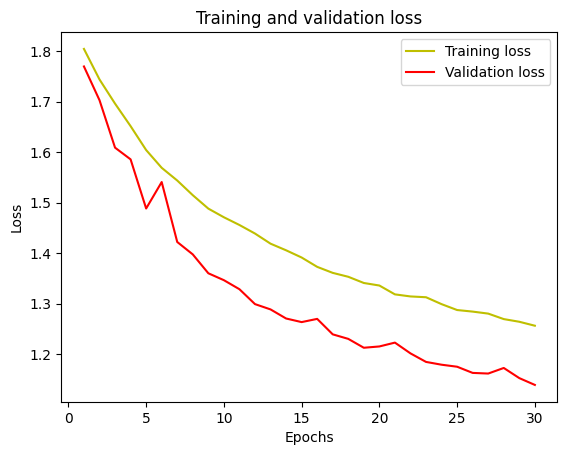

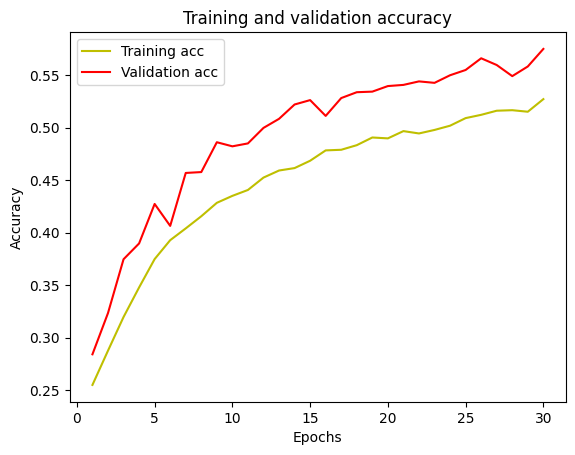

In [16]:
loss = train_model.history['loss']
val_loss = train_model.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = train_model.history['accuracy']
#acc = history.history['accuracy']
val_acc = train_model.history['val_accuracy']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [17]:
from keras.models import load_model
#import numpy as np
my_model = load_model('emotion_detection_model_30epochs.h5', compile=False)

#Generate a batch of images
test_img, test_lbl = validation_generator.__next__()
predictions=my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)


2/2 [==============================] - 0s 5ms/step


Accuracy =  0.53125


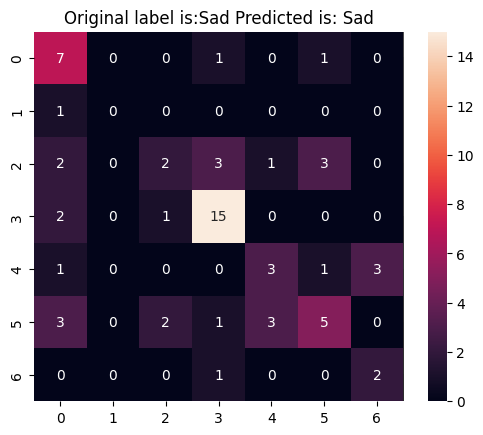

In [18]:

from sklearn import metrics
import seaborn as sns
import random
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions)
#print(cm)
import seaborn as sns
sns.heatmap(cm, annot=True)

class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
#Check results on a few select images
n=random.randint(0, test_img.shape[1] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()

In [21]:
#save in a jason file
model_json=model.to_json()
with open("emotion_model.json","w")as json_file:
  json_file.write(model_json)

In [22]:
model.save_weights('emotion_model.h5')